In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

INPUT = '../data'

harvest = {
    'name': 'commons_harvest__open',
    'trial_id': 'schelling',
    'n': 7,
    'ylim': 100,
    'ylim_r': 600,
    'loc': 'upper left',
}
mushroom = {
    'name': 'externality_mushrooms__dense',
    'trial_id': 'schelling',
    'n': 5,
    'ylim': 150,
    'ylim_r': 800,
    'loc': 'lower right',
}

FILES = [f'n_c_{i}.json' for i in range(8)]

In [11]:
env = harvest

FILES = [f'n_c_{i}.json' for i in range(env['n'] + 1)]
rewards_c = []
rewards_d = []
for n_c, f in enumerate(FILES):
    rewards = list(pd.read_json(os.path.join(INPUT, env['name'], env['trial_id'], f))['env_runners']['policy_reward_mean'].values())
    # print(n_c, rewards[:n_c], rewards[n_c:])
    rewards_c.append(np.mean(rewards[:n_c]))
    rewards_d.append(np.mean(rewards[n_c:]))

df = pd.DataFrame({'rewards_c': rewards_c, 'rewards_d': rewards_d})
df['social_welfare'] = df.index * df['rewards_c'].fillna(0) + (env['n']-df.index) * df['rewards_d'].fillna(0)
# shift rewards_c so schelling
df['rewards_c'] = np.roll(df['rewards_c'], -1)
df

/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,rewards_c,rewards_d,social_welfare
0,8.004444,11.481905,80.373333
1,7.960000,12.636296,83.822222
2,6.968889,14.499556,88.417778
3,7.383333,18.983333,96.840000
4,8.995556,26.604444,109.346667
5,19.081481,43.328889,131.635556
6,71.169524,94.462222,208.951111
7,NaN,NaN,498.186667


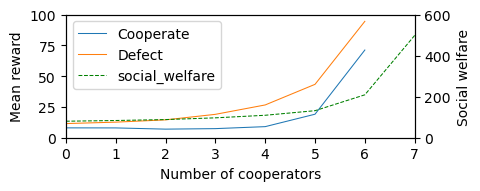

In [12]:
# plot SW on RHS
fig, ax = plt.subplots(figsize=(4.5, 1.6), facecolor='white')
df.plot(y='rewards_c', ax=ax, label= 'rewards_c', lw=0.75)
df.plot(y='rewards_d', ax=ax, label= 'rewards_d', lw=0.75)

ax.set_xlabel('Number of cooperators')
ax.set_ylabel('Mean reward')
# ax.set_title(f'Schelling', y=1.05)
ax.set_ylim(0, env['ylim'])
ax.set_xlim(0, env['n'])

ax2 = ax.twinx()
df.plot(y='social_welfare', ax=ax2, label= 'social_welfare', lw=0.75, linestyle='--', color='green')

ax2.set_ylim(0, env['ylim_r'])
ax2.set_ylabel('Social welfare')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, ['Cooperate', 'Defect'] + labels2, loc=env['loc'])
ax2.get_legend().remove()

fig.savefig(f'schelling_{env["name"]}', dpi=300, bbox_inches='tight')